In [143]:
from bmtool import graphs
import networkx as nx

Graph = graphs.generate_graph(config="../Network-Parameters/config_baseline.json",source='cortex',target='cortex')

In [144]:
Graph2 = graphs.generate_graph(config="../Network-Parameters/config_baseline.json",source='shell',target='cortex')

In [164]:
graphs.export_node_connections_to_csv(Graph, 'node_connections.csv')
graphs.export_node_connections_to_csv(Graph2, 'shell_connections.csv')

In [239]:
import pandas as pd
df = pd.read_csv("node_connections.csv")
df2 = pd.read_csv("shell_connections.csv")
df

,Unnamed: 0,Node Label,PN incoming Connections,FSI incoming Connections,LTS incoming Connections
0,0,PN,78,31,26
1,1,PN,55,35,18
2,2,PN,84,60,50
3,3,PN,19,20,12
4,4,PN,70,49,34
...,...,...,...,...,...
9995,9995,LTS,358,44,26
9996,9996,LTS,527,58,34
9997,9997,LTS,337,41,25
9998,9998,LTS,504,66,36


In [240]:
df2 = df2.head(10000)
df2 = df2.rename(columns={'PN incoming Connections': 'shell PN incoming Connections','FSI incoming Connections':'shell FSI incoming Connections','LTS incoming Connections':'shell LTS incoming Connections'})
df2 = df2.drop(columns=['Unnamed: 0','Node Label'])
df2

,shell PN incoming Connections,shell FSI incoming Connections,shell LTS incoming Connections
0,6,6,9
1,34,28,16
2,5,3,4
3,36,35,22
4,15,20,12
...,...,...,...
9995,152,18,7
9996,7,0,1
9997,185,35,8
9998,9,5,1


In [241]:
df = pd.concat([df, df2], axis=1)
df

,Unnamed: 0,Node Label,PN incoming Connections,FSI incoming Connections,LTS incoming Connections,shell PN incoming Connections,shell FSI incoming Connections,shell LTS incoming Connections
0,0,PN,78,31,26,6,6,9
1,1,PN,55,35,18,34,28,16
2,2,PN,84,60,50,5,3,4
3,3,PN,19,20,12,36,35,22
4,4,PN,70,49,34,15,20,12
...,...,...,...,...,...,...,...,...
9995,9995,LTS,358,44,26,152,18,7
9996,9996,LTS,527,58,34,7,0,1
9997,9997,LTS,337,41,25,185,35,8
9998,9998,LTS,504,66,36,9,5,1


In [242]:
exc_count = df['PN incoming Connections'] + df['shell PN incoming Connections']
inh_count = df['FSI incoming Connections'] + df['LTS incoming Connections'] + df['shell FSI incoming Connections'] + df['shell LTS incoming Connections']

In [243]:
net_exc = exc_count - inh_count
net_exc.name = 'net exc count'
exc_count.name = 'exc count'
inh_count.name = 'inh count'

In [244]:
df = pd.concat([df,net_exc,exc_count,inh_count],axis=1)

Now gotta get fr

In [245]:
import h5py
f = h5py.File('../Run-Storage/DONE_lower_FSI2PN_PulseSweepR2/block4/long/spikes.h5')
spikes_df = pd.DataFrame(
    {'node_ids': f['spikes']['cortex']['node_ids'], 'timestamps': f['spikes']['cortex']['timestamps']})

In [246]:
unique_count = spikes_df['node_ids'].nunique()
unique_count

9954

not every cell is firing at least for the sim. This may be an issue

In [247]:
spike_counts = spikes_df['node_ids'].value_counts()
spike_counts

9493    527
9285    489
9308    472
9027    463
8928    461
       ... 
834       1
3804      1
8346      1
5032      1
4175      1
Name: node_ids, Length: 9954, dtype: int64

In [248]:
total_seconds = 14.5
firing_rate = spike_counts / total_seconds
firing_rate.sort_index()

0        6.689655
1        2.275862
2        0.551724
3        0.758621
4        1.448276
          ...    
9995    10.275862
9996    16.344828
9997     5.241379
9998     7.034483
9999    19.172414
Name: node_ids, Length: 9954, dtype: float64

In [249]:
full_range = set(range(10000))

# Find the existing indices in the DataFrame
existing_indices = set(firing_rate.index)

# Find the missing indices
missing_indices = full_range - existing_indices

print(f"Missing indices: {sorted(missing_indices)}")

Missing indices: [496, 520, 730, 779, 830, 899, 1068, 1484, 1563, 1578, 1728, 2119, 2797, 2862, 3214, 3226, 4605, 5054, 5082, 5212, 5264, 5531, 5663, 6013, 6284, 6356, 6380, 6793, 6832, 6859, 6874, 7001, 7372, 7550, 7978, 8119, 8241, 8475, 8480, 8498, 8830, 9157, 9280, 9310, 9373, 9498]


In [250]:
# Create a Series for the missing indices with the value set to zero
missing_indices_series = pd.Series(0, index=missing_indices)

# Combine the original Series with the new Series
firing_rate = pd.concat([firing_rate,missing_indices_series])
# Sort the Series by index
firing_rate.sort_index()
firing_rate.name = 'firing rate'

In [251]:
df = pd.concat([df,firing_rate],axis=1)

In [252]:
df

,Unnamed: 0,Node Label,PN incoming Connections,FSI incoming Connections,LTS incoming Connections,shell PN incoming Connections,shell FSI incoming Connections,shell LTS incoming Connections,net exc count,exc count,inh count,firing rate
0,0,PN,78,31,26,6,6,9,12,84,72,6.689655
1,1,PN,55,35,18,34,28,16,-8,89,97,2.275862
2,2,PN,84,60,50,5,3,4,-28,89,117,0.551724
3,3,PN,19,20,12,36,35,22,-34,55,89,0.758621
4,4,PN,70,49,34,15,20,12,-30,85,115,1.448276
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,LTS,358,44,26,152,18,7,415,510,95,10.275862
9996,9996,LTS,527,58,34,7,0,1,441,534,93,16.344828
9997,9997,LTS,337,41,25,185,35,8,413,522,109,5.241379
9998,9998,LTS,504,66,36,9,5,1,405,513,108,7.034483


In [253]:
PN_cell = df[df['Node Label'] == 'PN']
FSI_cell = df[df['Node Label'] == 'FSI']
LTS_cell = df[df['Node Label'] == 'LTS']

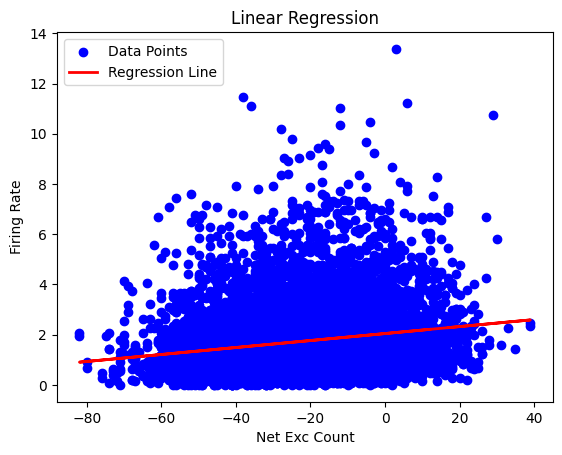

R^2 score: 0.03


In [254]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

cell = 'PN'
if cell == 'PN':
    X = PN_cell[['net exc count']].values.reshape(-1, 1)  # Feature matrix
    y = PN_cell['firing rate'].values  # Target variable
if cell == 'FSI':
    X = FSI_cell[['net exc count']].values.reshape(-1, 1)  # Feature matrix
    y = FSI_cell['firing rate'].values  # Target variable
if cell == 'LTS':
    X = LTS_cell[['net exc count']].values.reshape(-1, 1)  # Feature matrix
    y = LTS_cell['firing rate'].values  # Target variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the model
y_pred = model.predict(X)

# Calculate R^2 score
r2 = r2_score(y, y_pred)

# Plot data and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Net Exc Count')
plt.ylabel('Firing Rate')
plt.title('Linear Regression')
plt.legend()
plt.show()

print(f"R^2 score: {r2:.2f}")

In [255]:
PN_cell = PN_cell[PN_cell['net exc count'] > 0]
PN_cell

,Unnamed: 0,Node Label,PN incoming Connections,FSI incoming Connections,LTS incoming Connections,shell PN incoming Connections,shell FSI incoming Connections,shell LTS incoming Connections,net exc count,exc count,inh count,firing rate
0,0,PN,78,31,26,6,6,9,12,84,72,6.689655
36,36,PN,71,39,28,5,3,4,2,76,74,1.724138
38,38,PN,69,34,28,2,1,2,6,71,65,1.310345
49,49,PN,60,27,11,30,19,12,21,90,69,2.344828
51,51,PN,72,29,16,4,7,1,23,76,53,3.034483
...,...,...,...,...,...,...,...,...,...,...,...,...
8674,8674,PN,66,18,23,17,14,13,15,83,68,3.241379
8686,8686,PN,58,26,18,9,11,8,4,67,63,3.586207
8691,8691,PN,45,19,14,39,29,13,9,84,75,3.310345
8698,8698,PN,70,28,14,13,9,15,17,83,66,1.724138
